# Statistics

### Random variables


Two types of random variables.<br>

1:- Decrete and Continuous Variables <br>



### Probability Distribution 

It is the list of all the possible outcome of a random variables along with corresponding 
probability values.

Problem:- In many scerios outcome is so large and hence table would be tedious to write down.

### Probability distribution funcitons

So we make a function to sort out the large outcome problem bcz so we didn't rely on table.

Two types of pdf<br>
1:- Probability Mass funciton.<br>
2:- Probability Density function.<br>

### Probability Mass function.

It give the probability of Discrete random variables.<br>

PMF must satisfy two conditions.<br>
1:- Prob assign each val must be non-neg.<br>
2:- Sum of all the prob assign to all the possible val must equal to one.

In [2]:
import random

L = []

for i in range(10000):
    L.append(random.randint(1, 6))

In [9]:
import pandas as pd

s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()


In [10]:
s

1    0.1678
2    0.1665
3    0.1723
4    0.1672
5    0.1609
6    0.1653
Name: count, dtype: float64

<Axes: >

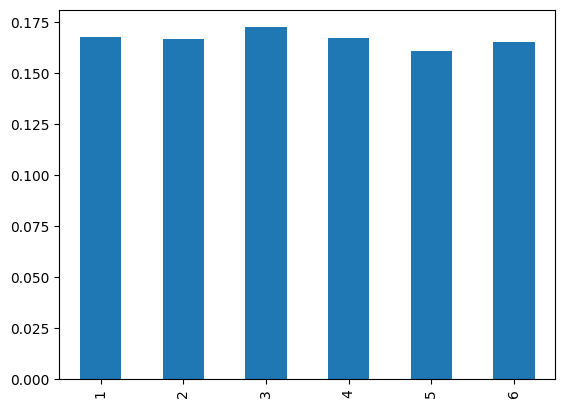

In [12]:
s.plot(kind='bar')

#### Cumulative Distribution Function

f(x) = P(X <= x>) <br>
It tell about the probability of 5 or less than that.<br>
where as pmf decs the 5 hna ka probability.

In [13]:
import numpy as np

np.cumsum(s)

1    0.1678
2    0.3343
3    0.5066
4    0.6738
5    0.8347
6    1.0000
Name: count, dtype: float64

<Axes: >

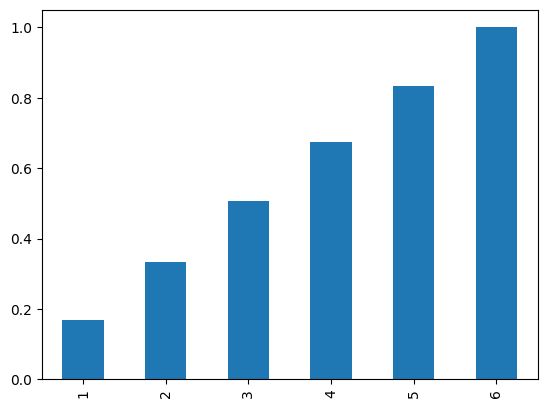

In [14]:
np.cumsum(s).plot(kind = 'bar')

### Probability Density Function

It is for continuous random variable.<br>
In this x axis it shows the marks and in y axis it show the probability density which unify the prob density function.<br>
How to calc the prob?
Area under the curve is show the probability.

### Parametric density Estimation

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50 , scale=5 , size=1000)


In [16]:
sample.mean()

49.876296134878

(array([  6.,  20.,  75., 171., 239., 243., 169.,  62.,  12.,   3.]),
 array([33.77072131, 37.0388458 , 40.30697029, 43.57509477, 46.84321926,
        50.11134374, 53.37946823, 56.64759271, 59.9157172 , 63.18384168,
        66.45196617]),
 <BarContainer object of 10 artists>)

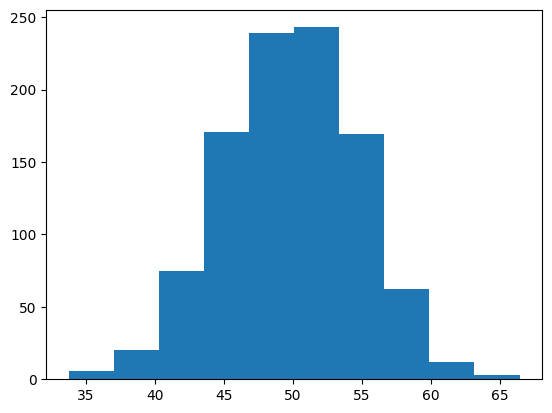

In [17]:
plt.hist(sample, bins=10)

In [18]:
sample_mean = sample.mean()
sample_std = sample.std()

In [19]:
from scipy.stats import norm
dist = norm(loc=sample_mean, scale=sample_std)

In [20]:
values = np.linspace(sample.min(), sample.max(), num=100)

In [21]:
probabilities = [dist.pdf(value) for value in values]

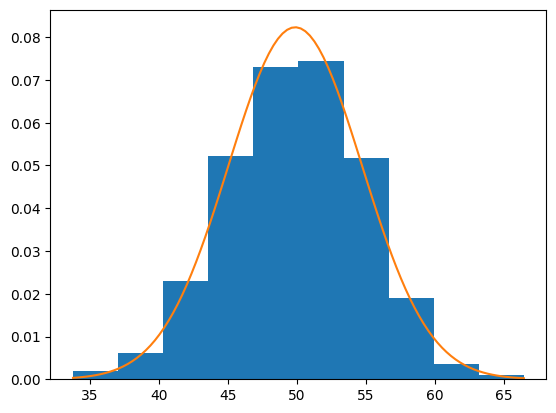

In [22]:
plt.hist(sample, bins=10, density=True)
plt.plot(values, probabilities)

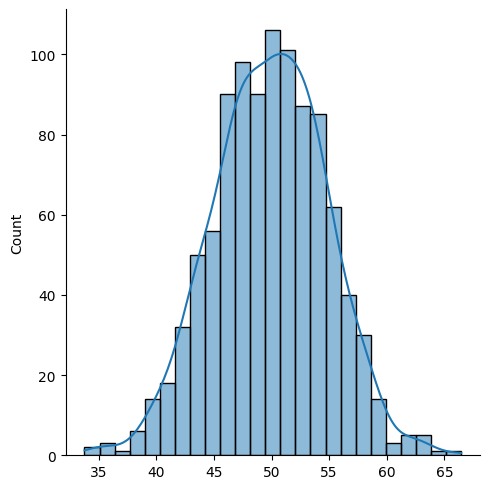

In [24]:
import seaborn as sns
sns.displot(sample, kde=True)

### Non parametric density Estimation

Sometime distribution is not famous means not normal,beta or anything. Than we use Non-parametric density estimation.

#### Kernel Density Estimate (KDE)

Apka data ma jitna bhi points hn har point ko center bna ka ap utna gausian kernel create kr deta ho.

In [3]:
from numpy.random import normal
import numpy as np
import matplotlib.pyplot as plt

In [5]:
sample1 = normal(loc=20 , scale=5 , size=300)
sample2 = normal(loc=40 , scale=5 , size=700)
sample = np.hstack((sample1, sample2))

(array([ 1.,  0.,  3.,  4.,  5.,  2.,  5., 11.,  9., 15., 12., 18., 26.,
        31., 18., 14., 20., 24., 16., 15., 17., 10.,  9.,  9., 10., 14.,
        13., 15., 18., 27., 38., 31., 45., 60., 48., 52., 62., 55., 36.,
        39., 40., 28., 23., 15., 17.,  6.,  4.,  3.,  4.,  3.]),
 array([ 6.52643997,  7.4682789 ,  8.41011783,  9.35195676, 10.29379569,
        11.23563462, 12.17747355, 13.11931248, 14.06115141, 15.00299034,
        15.94482927, 16.8866682 , 17.82850713, 18.77034606, 19.71218499,
        20.65402392, 21.59586285, 22.53770178, 23.47954071, 24.42137964,
        25.36321857, 26.3050575 , 27.24689643, 28.18873536, 29.13057429,
        30.07241322, 31.01425215, 31.95609108, 32.89793001, 33.83976894,
        34.78160787, 35.7234468 , 36.66528573, 37.60712466, 38.54896359,
        39.49080252, 40.43264145, 41.37448038, 42.31631931, 43.25815824,
        44.19999717, 45.1418361 , 46.08367503, 47.02551396, 47.96735289,
        48.90919182, 49.85103075, 50.79286968, 51.73470861,

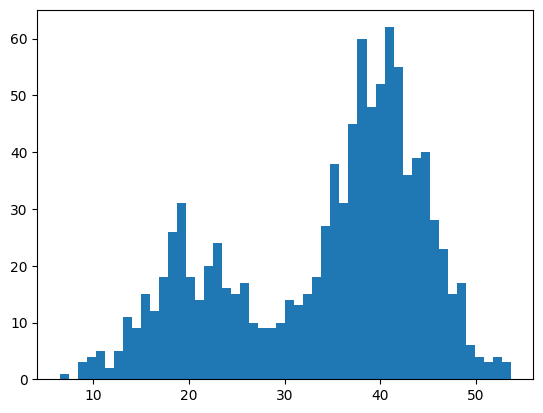

In [7]:
plt.hist(sample, bins=50)

In [8]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=3, kernel='gaussian')

sample = sample.reshape(len(sample), 1)
model.fit(sample)

KernelDensity(bandwidth=3)

In [9]:
values = np.linspace(sample.min(), sample.max(), num=100)
values = values.reshape(len(values), 1)

In [10]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

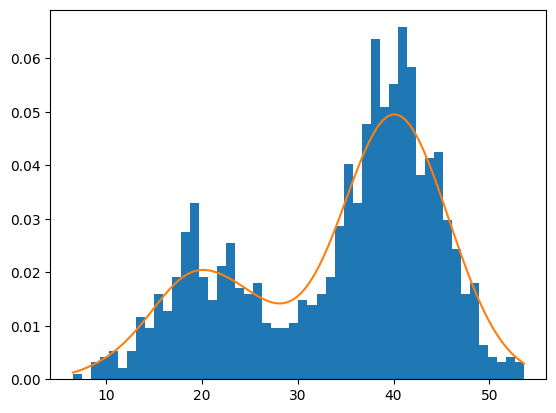

In [11]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:] , probabilities)
plt.show()

same above thing we do in seaborn 

In [12]:
import seaborn as sns

<Axes: ylabel='Density'>

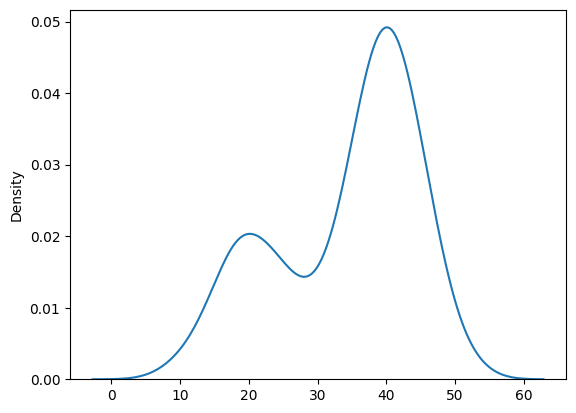

In [14]:
sns.kdeplot(sample.reshape(1000), bw_method=0.3)

### Normal Distribution 

It is a probability distribution that is used in statistical analysis. 

In this their are two main parameter mean(mieu) and sigmoid(std dev). If mean change than graph shift toward the left or right and if the sigmoid change than the graph show the spread of the data.

X -> N(miew , sigmoid)

#### Standard Normal variate

It is the standardize form of the normal dist with mean=0 and std dev = 1

Ap koi bhi normal dist ko la ka ao apko sirf usa standard normal variate ma convert krna ha which simply means standardized krna ha or than question jo bhi pocha ja rha uska z value find krna ha or z value ko table ka through find kro ga wohi apka ans ho ga.